In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# --- Load dataset ---
df = pd.read_csv("data/classification_data_raw.csv")

features = ['income', 'per_college_educated_x', 'median_contract_rent']
X = df[features]
y = df['gentrified']

# --- Scale features globally ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# --- Base models ---
lr = LogisticRegression(
    penalty='l2', C=0.01, class_weight='balanced', max_iter=1000, random_state=42
)
rf = RandomForestClassifier(
    n_estimators=100, class_weight='balanced', random_state=42
)

# --- Final estimator (stacking meta-learner) ---
final_estimator = LogisticRegressionCV(
    cv=5, max_iter=10000, random_state=42
)

# --- Stacking model ---
stack_model = StackingClassifier(
    estimators=[('lr', lr), ('rf', rf)],
    final_estimator=final_estimator,
    passthrough=True
)

# --- Train and evaluate ---
stack_model.fit(X_train, y_train)
y_pred = stack_model.predict(X_test)
y_prob = stack_model.predict_proba(X_test)[:, 1]

print("Stacked Model Performance:")
print(classification_report(y_test, y_pred))


FileNotFoundError: [Errno 2] No such file or directory: 'data/classification_data_raw.csv'

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score

print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("PR AUC:", average_precision_score(y_test, y_prob))


ROC AUC: 0.7791276500496949
PR AUC: 0.11630402159869507


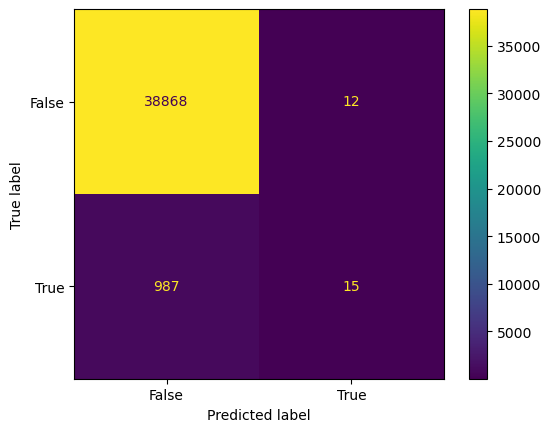

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(stack_model, X_test, y_test)


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define stratified K-Fold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation using F1 score
f1_scores = cross_val_score(stack_model, X, y, cv=kfold, scoring='f1')

print("Cross-validated F1 scores:", f1_scores)
print("Average F1 score:", np.mean(f1_scores))


Cross-validated F1 scores: [0.69594219 0.68665158 0.68148148 0.67681895 0.68580895]
Average F1 score: 0.6853406303124397
